# CAT Boost Model

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

sns.set_style("whitegrid")

The cleaned and prepared scraped dataset is stored in apartments_final.csv

In [7]:
df = pd.read_csv("apartments_final.csv")

df.head()


,url,listing_id,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude,neighborhood,nbhd
0,https://www.apartments.com/2372-beckwith-dr-in...,ze0jqwy,46218,751,2,1.0,679.0,25,33,705,39.80125,-86.12643,Martindale-Brightwood,Martindale-Brightwood
1,https://www.apartments.com/7491-n-shadeland-av...,s34dq64,46250,1795,3,2.0,2500.0,54,33,1795,39.89034,-86.04540,I-69 Fall Creek,I-69 Fall Creek
2,https://www.apartments.com/nice-3-bedroom-ranc...,n669z9m,46237,1095,3,1.0,1439.0,29,32,1095,39.72238,-86.12113,University Heights,University Heights
3,https://www.apartments.com/1102-n-oakland-ave-...,c4kr5zf,46201,1300,3,1.5,1500.0,67,38,800,39.78265,-86.11278,Near Eastside,Near Eastside
4,https://www.apartments.com/634-e-10th-st-india...,rl2dfp0,46202,1600,2,2.0,1400.0,74,53,1600,39.78089,-86.14610,Chatham Arch,Chatham Arch


In [13]:
df.describe()

,zipcode,monthly_rent,bedrooms,bathrooms,square_feet,walk_score,transit_score,deposit,latitude,longitude
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,46222.282434,1283.833525,2.045924,1.564868,1130.678530,37.180253,25.227325,1207.065442,39.791344,-86.148214
std,31.355223,454.606361,1.121454,0.590232,627.812978,23.783910,17.084812,513.401254,0.079023,0.092329
min,46038.000000,450.000000,0.000000,1.000000,50.000000,0.000000,0.000000,100.000000,39.626880,-86.341270
25%,46211.000000,909.000000,1.000000,1.000000,700.000000,16.000000,14.000000,850.000000,39.748400,-86.214015
50%,46224.000000,1202.000000,2.000000,1.500000,1025.000000,37.000000,29.000000,1150.000000,39.795340,-86.143990
75%,46237.000000,1634.500000,3.000000,2.000000,1390.000000,54.000000,35.000000,1597.000000,39.849420,-86.084705
max,46298.000000,2500.000000,5.000000,4.000000,9991.000000,99.000000,68.000000,2500.000000,39.946250,-85.949920


In [14]:
df.dtypes

url               object
listing_id        object
zipcode            int64
monthly_rent       int64
bedrooms           int64
bathrooms        float64
square_feet      float64
walk_score         int64
transit_score      int64
deposit            int64
latitude         float64
longitude        float64
neighborhood      object
nbhd              object
dtype: object

In [123]:
df["bedXbath"] = df.bedrooms * df.bathrooms
df["feet_per_room"] = df.square_feet/(df.bedrooms+df.bathrooms)

X = df.copy()
y = df['monthly_rent']

drop_cols = [
             "monthly_rent",
             "deposit",
             "listing_id",
             #"latitude",
             #"longitude",
             "url",
             "neighborhood",
             #"zipcode",
             #"nbhd",
              ]
for col in drop_cols:
    X.drop(col, axis=1, inplace=True)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [125]:
model = CatBoostRegressor(iterations=100, depth=4, learning_rate=0.3, loss_function='RMSE')
model.fit(X_train, y_train,
          cat_features=["nbhd"],
          eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 399.5281878	test: 363.4261193	best: 363.4261193 (0)	total: 18.3ms	remaining: 1.81s
1:	learn: 357.2916847	test: 320.5150420	best: 320.5150420 (1)	total: 30.1ms	remaining: 1.48s
2:	learn: 331.7030627	test: 298.2219997	best: 298.2219997 (2)	total: 43.3ms	remaining: 1.4s
3:	learn: 312.3089615	test: 282.0784326	best: 282.0784326 (3)	total: 58.1ms	remaining: 1.39s
4:	learn: 298.7377768	test: 273.9955722	best: 273.9955722 (4)	total: 70.7ms	remaining: 1.34s
5:	learn: 290.0367575	test: 269.8684002	best: 269.8684002 (5)	total: 85.2ms	remaining: 1.33s
6:	learn: 284.0729935	test: 266.9170142	best: 266.9170142 (6)	total: 98.5ms	remaining: 1.31s
7:	learn: 276.4287189	test: 262.7788808	best: 262.7788808 (7)	total: 114ms	remaining: 1.31s
8:	learn: 272.4559021	test: 260.4953007	best: 260.4953007 (8)	total: 132ms	remaining: 1.34s
9:	learn: 268.2475973	test: 260.4665728	best: 260.4665728 (9)	total: 145ms	remaining: 1.31s
10:	learn: 265.7343825	test: 259.0855484	best: 259.0855484 (10)	total: 163

In [126]:
model.score(X_test, y_test)

0.6971764333790181

In [127]:
predicted = model.predict(X_test)

In [128]:
baseline = y.mean()

In [129]:
baseline_var = ((y_test-baseline)**2).sum()/len(y_test)
print(f"Baseline RMSE: {baseline_var}")
print(f"Baseline rent error: {baseline_var**0.5}")

Baseline RMSE: 179309.48955428004
Baseline rent error: 423.449512402931


In [130]:
model_var = ((y_test-predicted)**2).sum()/len(y_test)
print(f"CATboost RMSE: {model_var}")
print(f"CATBoost rent error: {model_var**0.5}")

CATboost RMSE: 54077.738655310175
CATBoost rent error: 232.5462075702594


Text(0, 0.5, 'Percent Error [Model-Listing]')

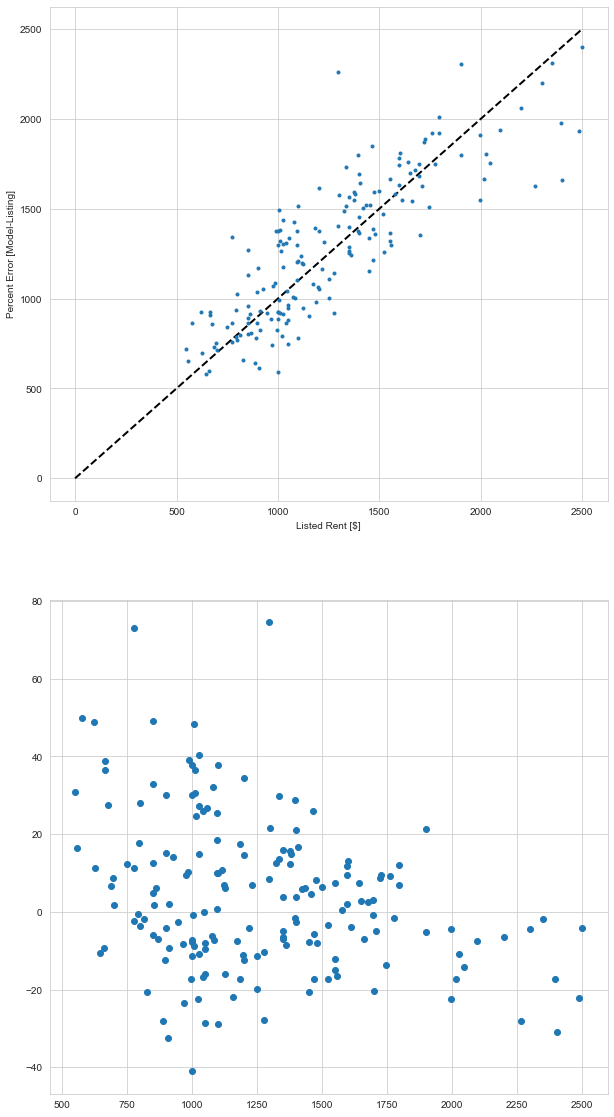

In [137]:
fig, axs = plt.subplots(2,1, figsize=(10,20))
axs[0].errorbar(y_test, predicted, yerr=None, linestyle="", marker=".")
axs[0].plot(range(2500), range(2500), linestyle="--", linewidth="2", color="k")
axs[0].set_xlabel("Listed Rent [$]")
axs[0].set_ylabel("Predicted Rent[$]")

axs[1].scatter(y_test, (predicted-y_test)*100/y_test)
axs[0].set_xlabel("Listed Rent [$]")
axs[0].set_ylabel("Percent Error [Model-Listing]")